In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data(validation_only=True)
data2=[]
for ii in range(10):
    for jj in range(3):
        data2.append(data[500+jj*1000+ii])
data = data2
for d in data:
   print(d.family)
#d = data[11]
#print(d.family)

CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B
CurveFault_B
CurveVel_B
FlatFault_B


In [3]:
# importlib.reload(seis_prior)
# importlib.reload(seis_diagnostics)
# importlib.reload(seis_invert)
# kgs.profiling=False
# kgs.debugging_mode = 0
# seis_forward2.profiling=False
# seis_forward2.reset_profile()

# model = seis_invert.InversionModel()
# model.state = 1
# model.method = 'L-BFGS-B'
# model.maxiter = 5000
# model.prior = seis_prior.SquaredExponential()


# model.prior.basis_functions();
# w = cp.linalg.eigvalsh(model.prior.P)   
# plt.figure()
# plt.semilogy(cp.asnumpy(cp.abs(w)))

capturing graph


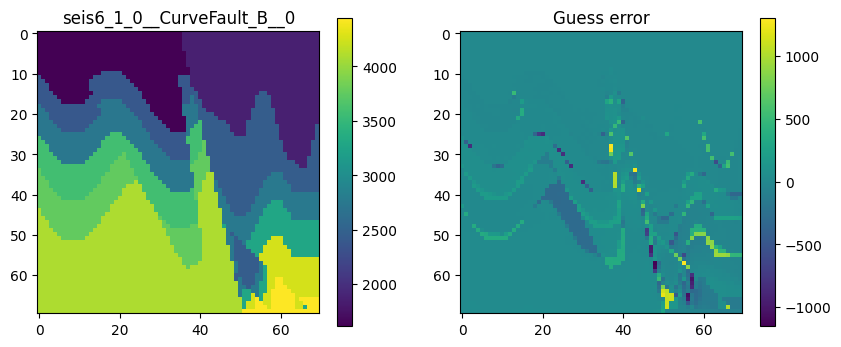

diag 3.250623900849397e-05
(4901, 4901)
capturing graph


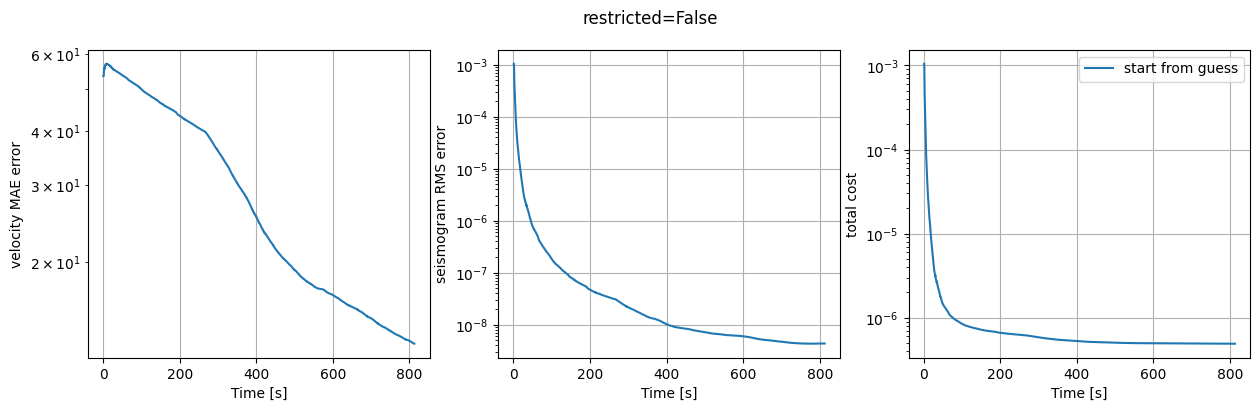

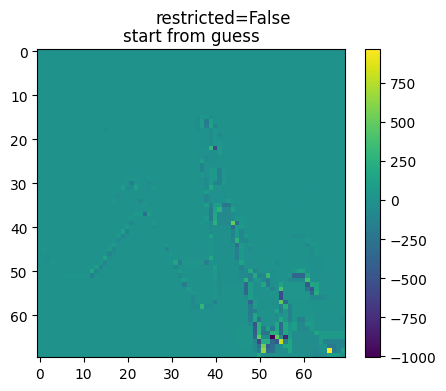

diag 3.250623900849397e-05
(4901, 2290)


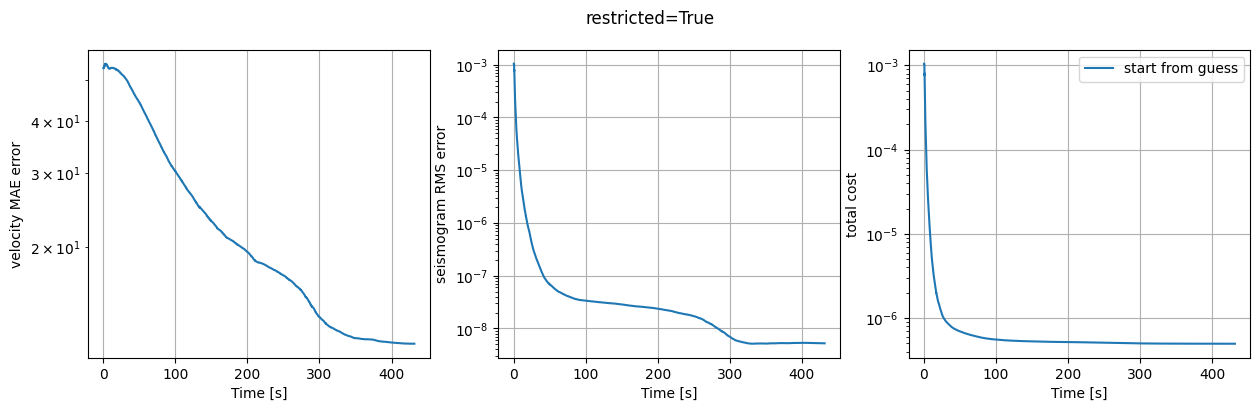

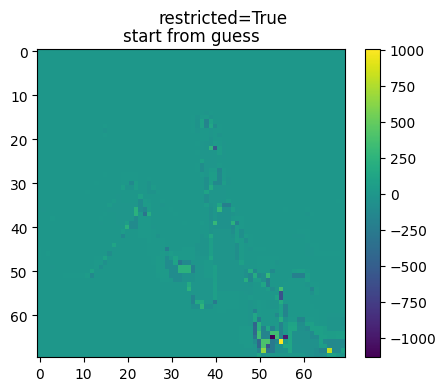

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.77it/s]


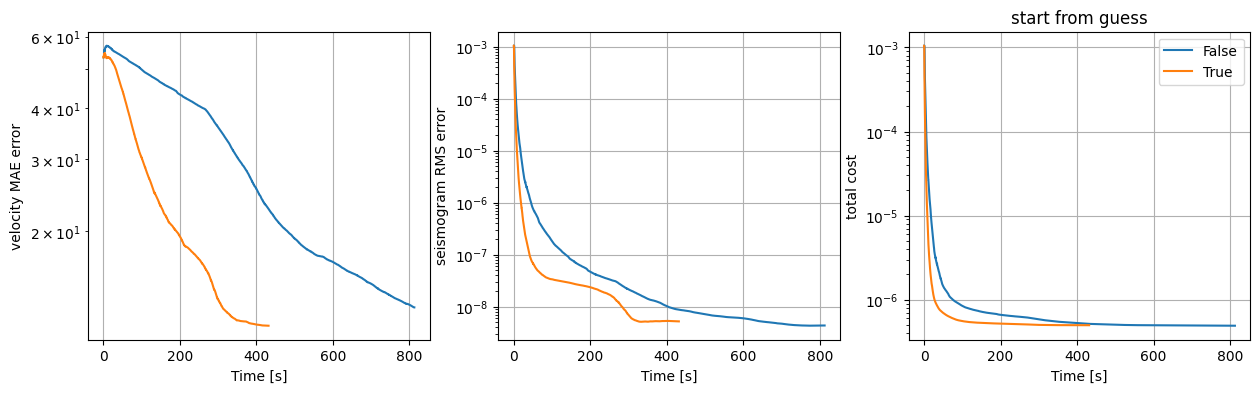

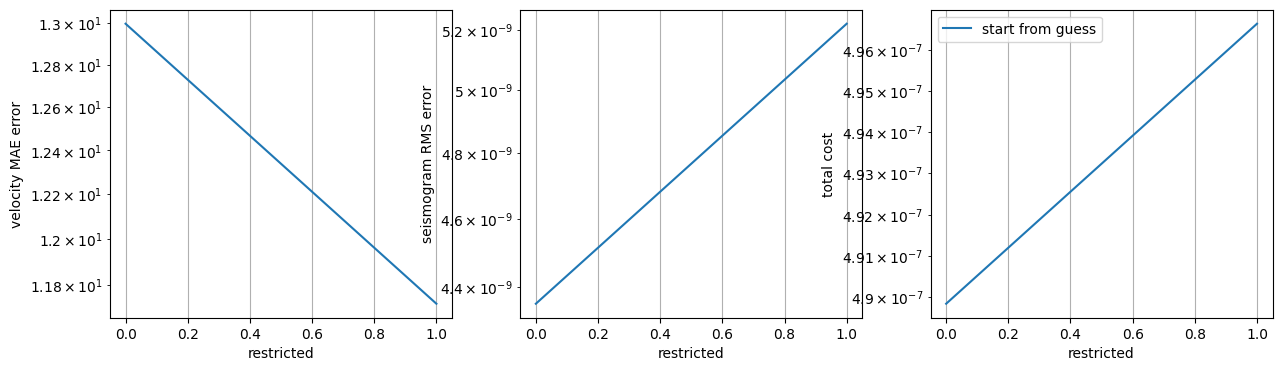

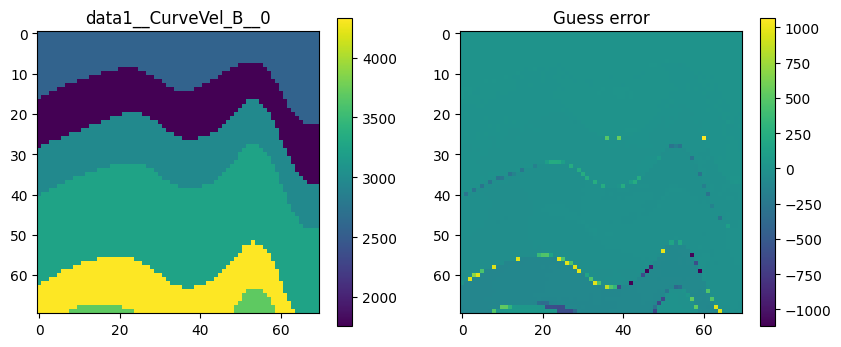

diag 6.559700247578487e-05
(4901, 4901)


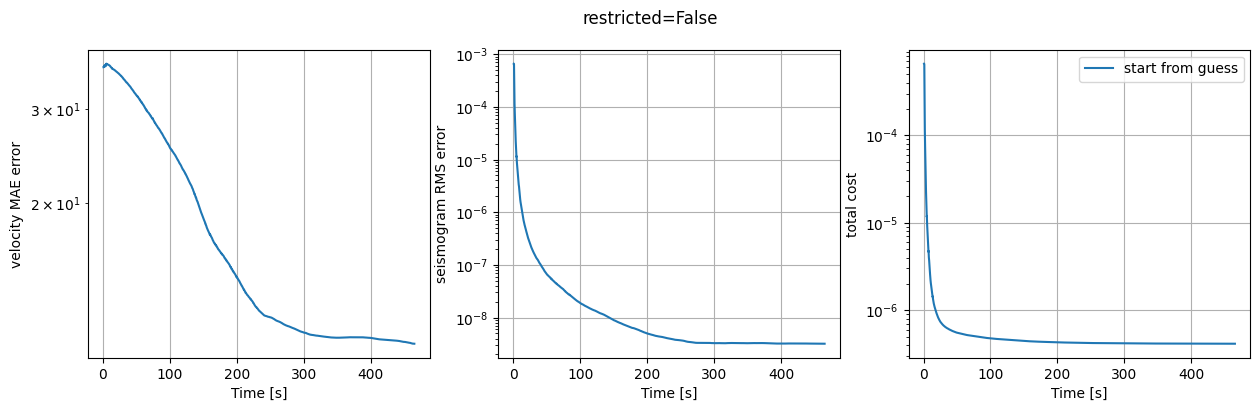

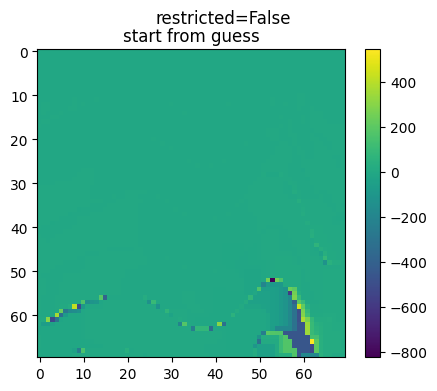

diag 6.559700247578487e-05
(4901, 1426)


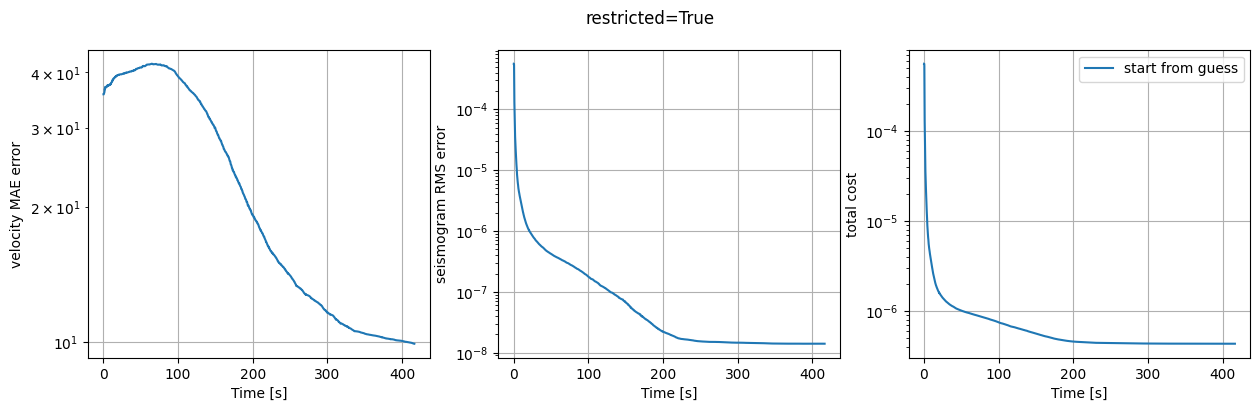

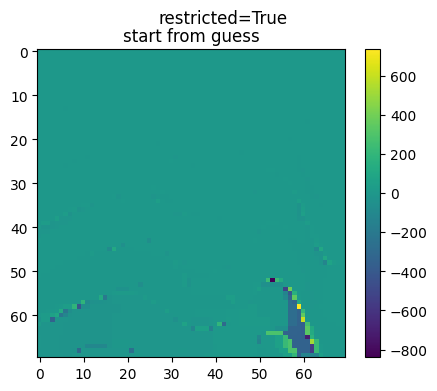

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.34it/s]


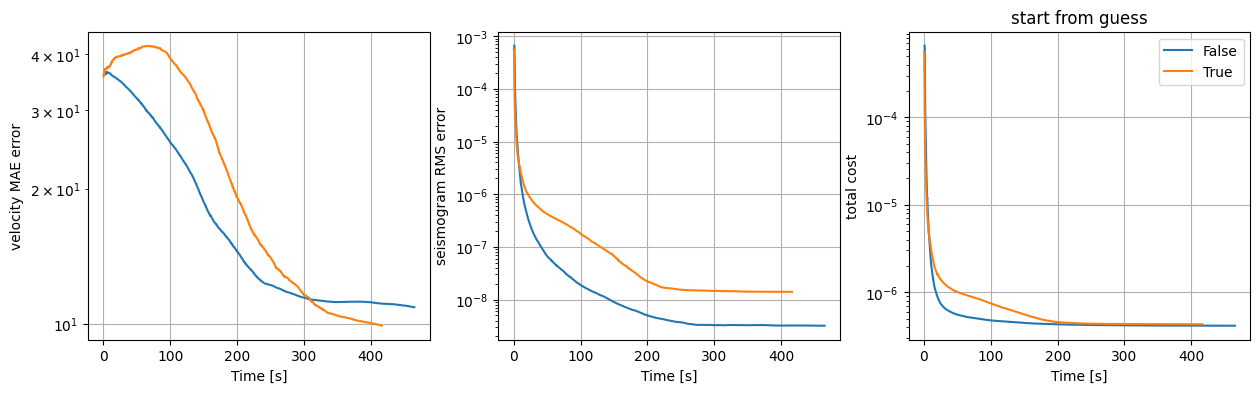

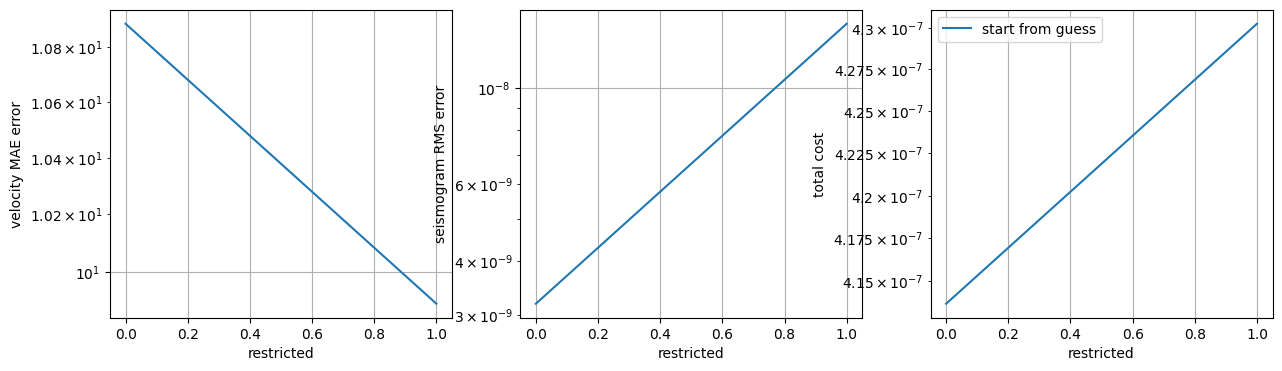

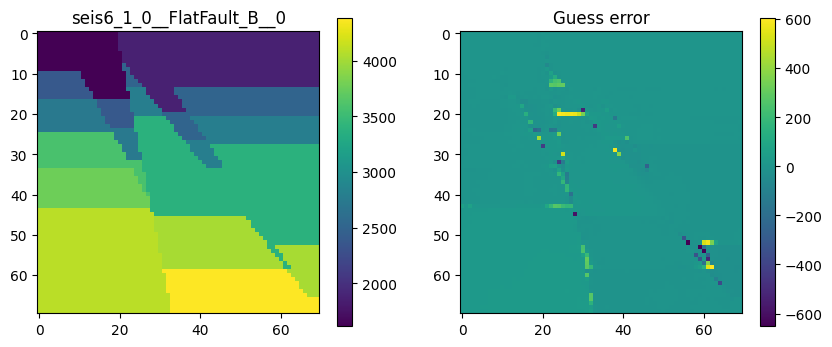

diag 4.130169085194646e-05
(4901, 4901)


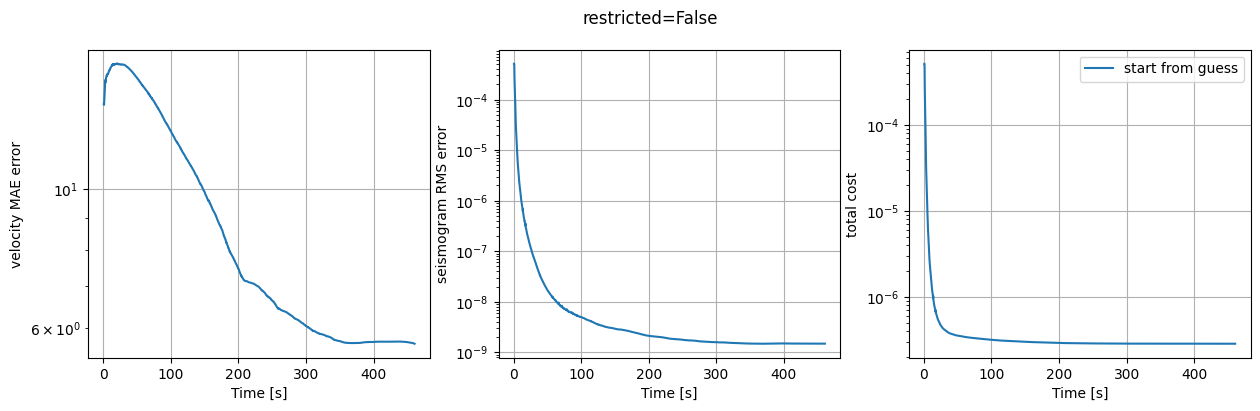

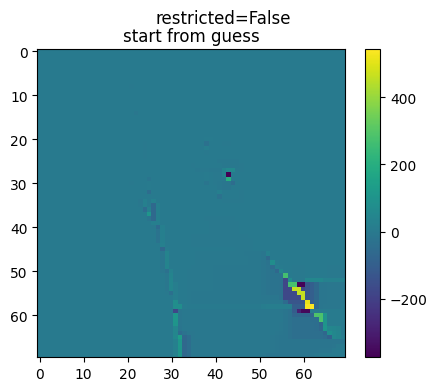

diag 4.130169085194646e-05
(4901, 1312)


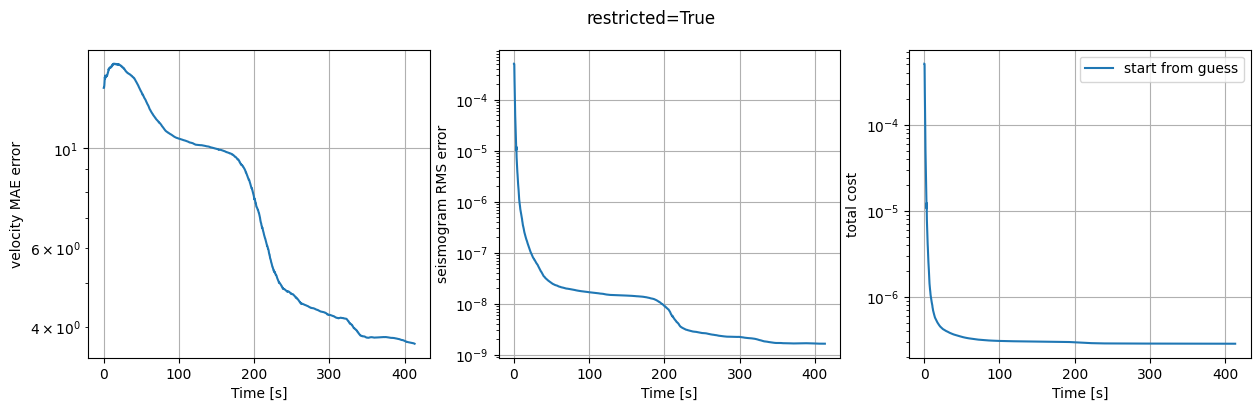

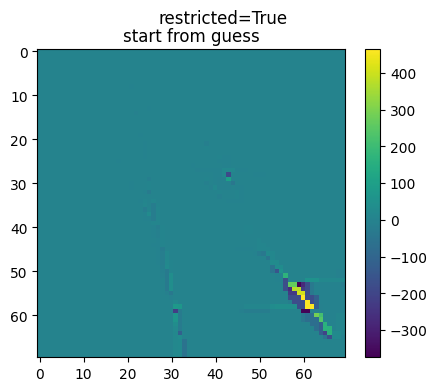

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.20it/s]


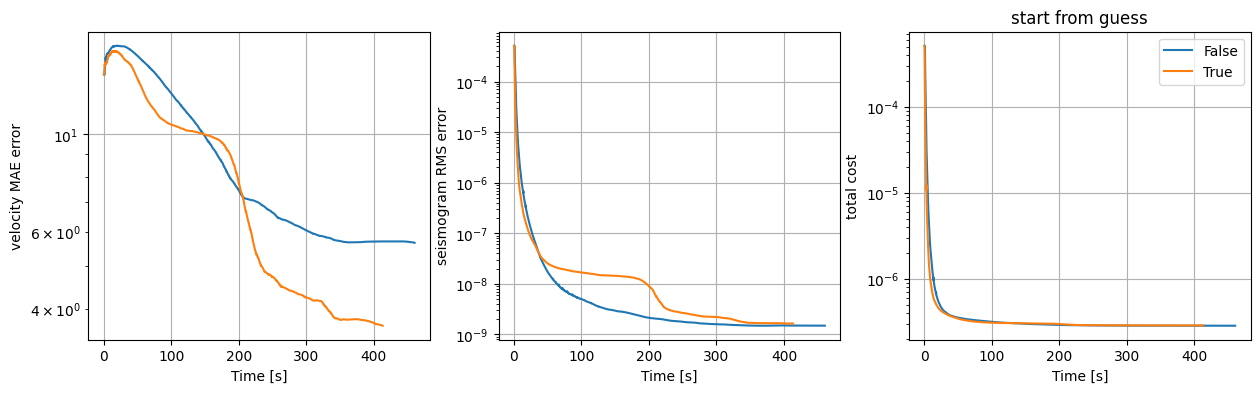

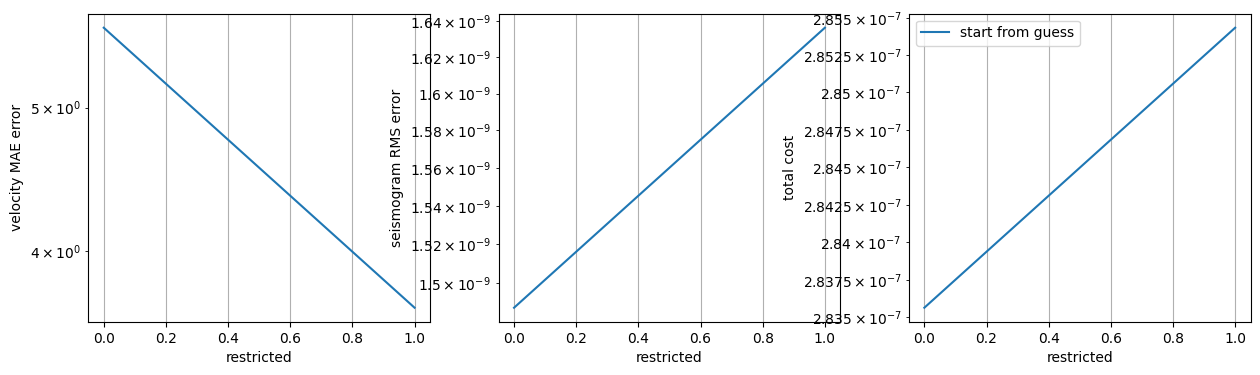

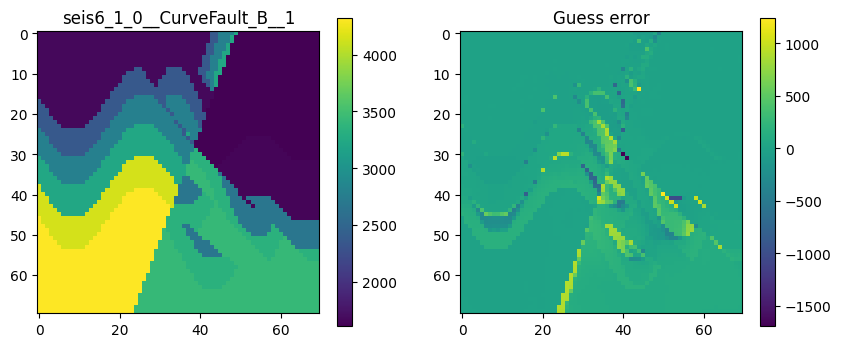

diag 4.576705036178085e-05
(4901, 4901)


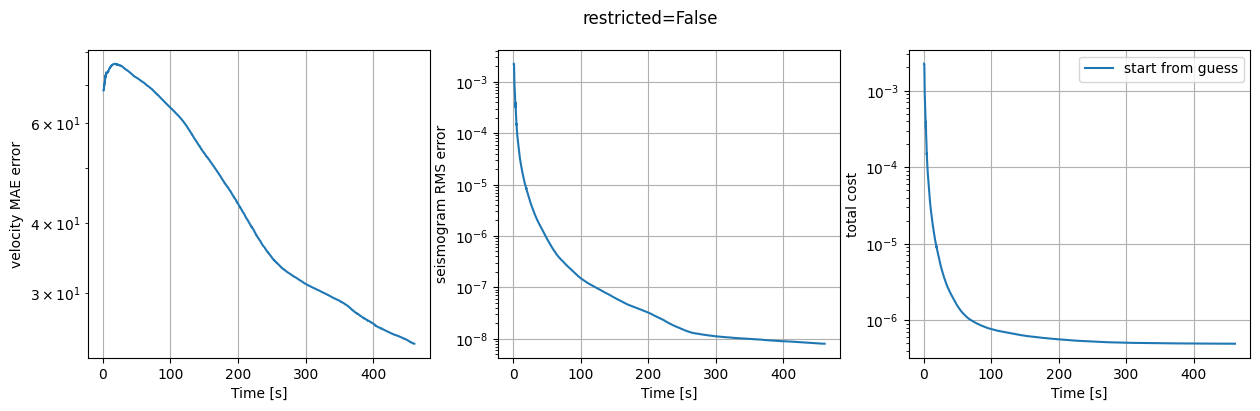

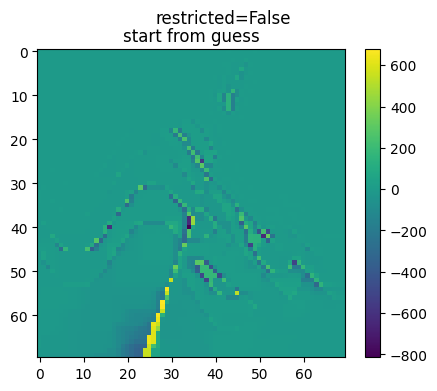

diag 4.576705036178085e-05
(4901, 2320)


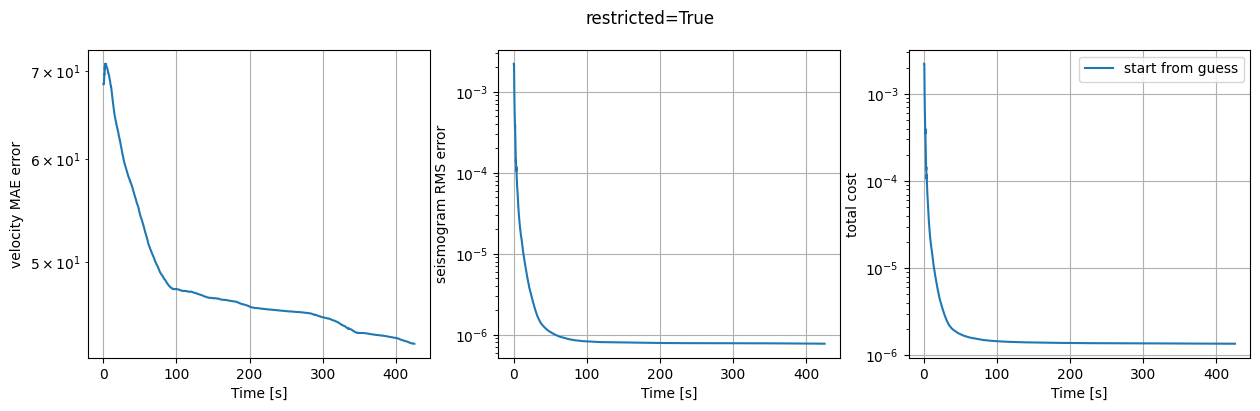

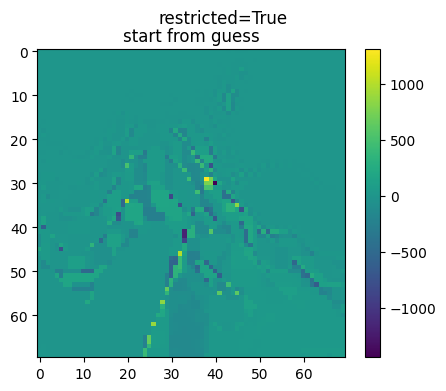

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.64it/s]


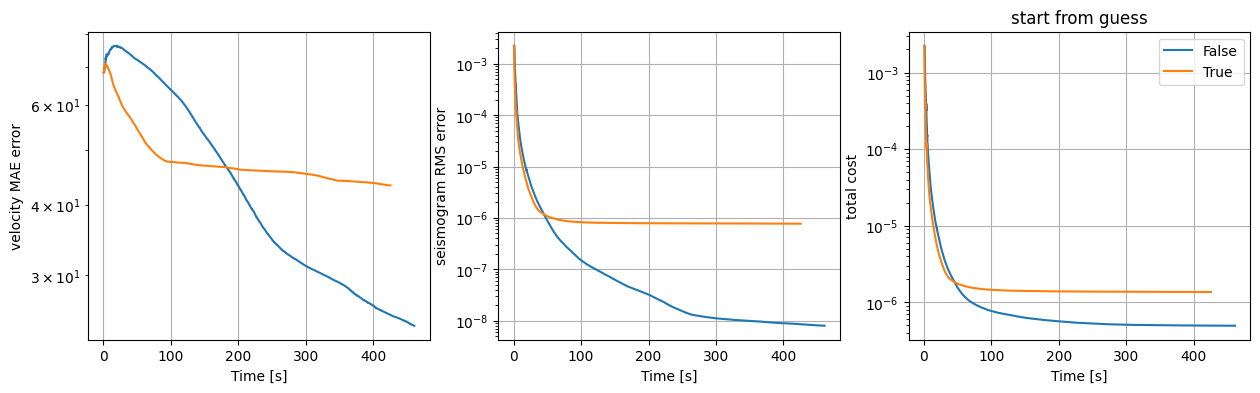

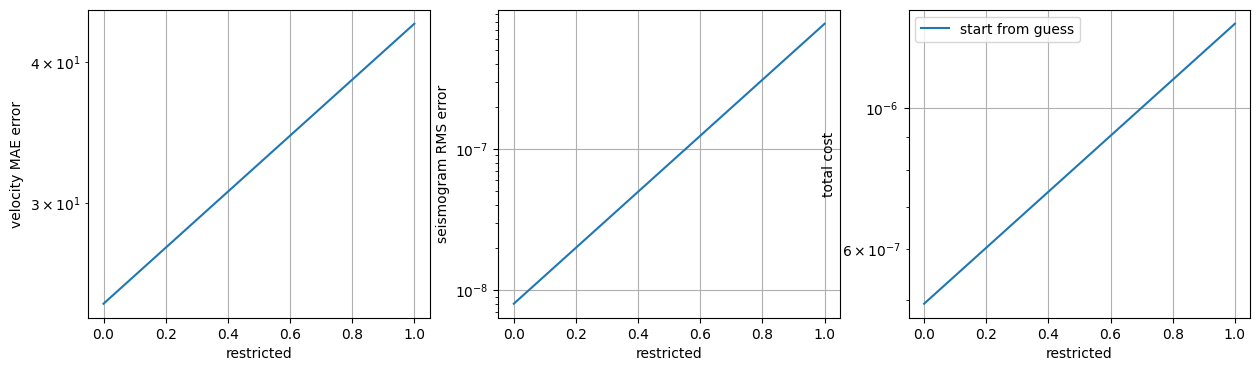

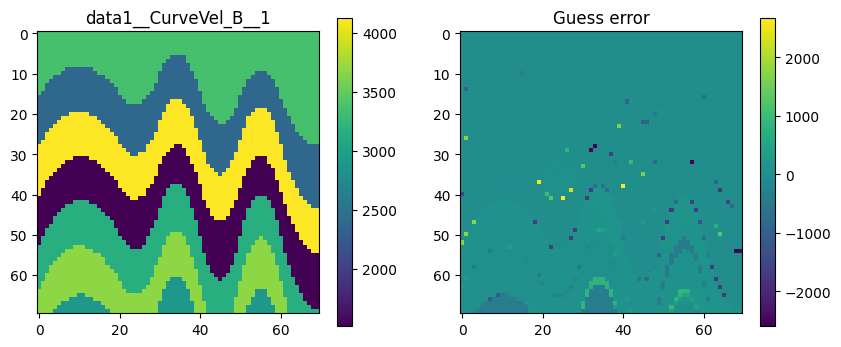

diag 5.377748430791351e-05
(4901, 4901)


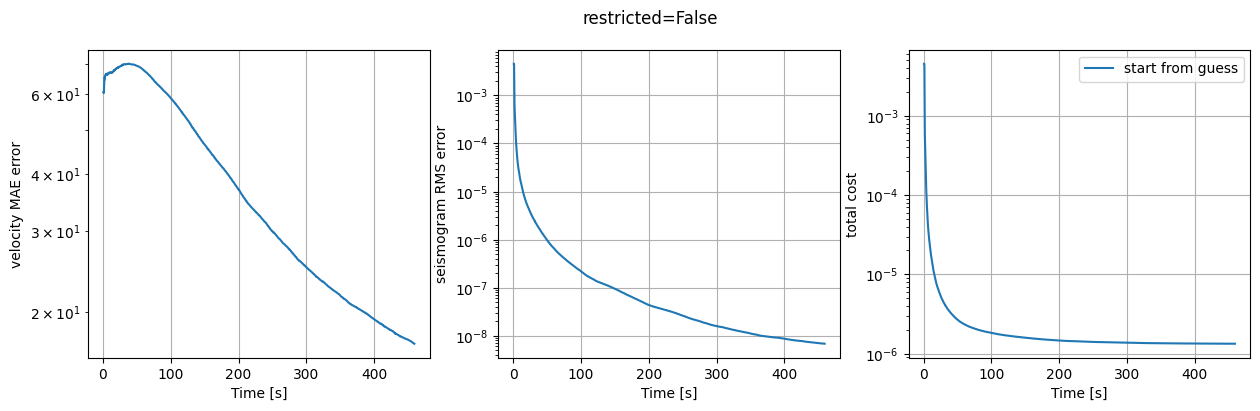

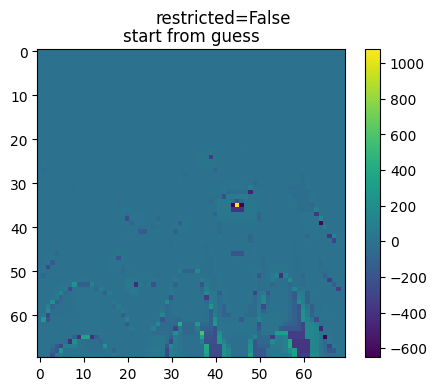

diag 5.377748430791351e-05
(4901, 2855)


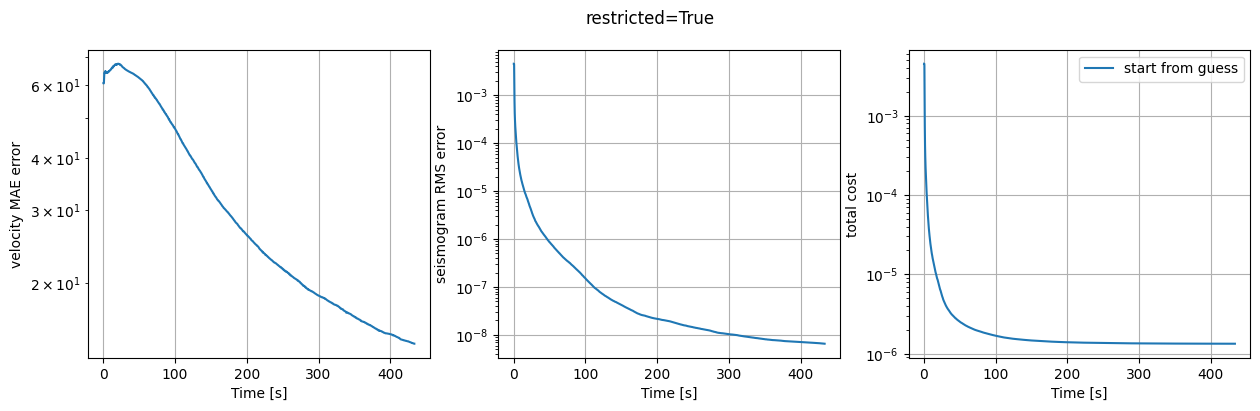

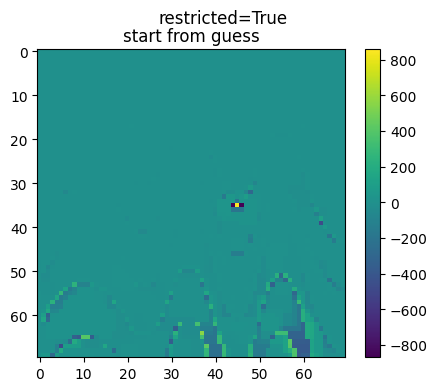

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.15it/s]


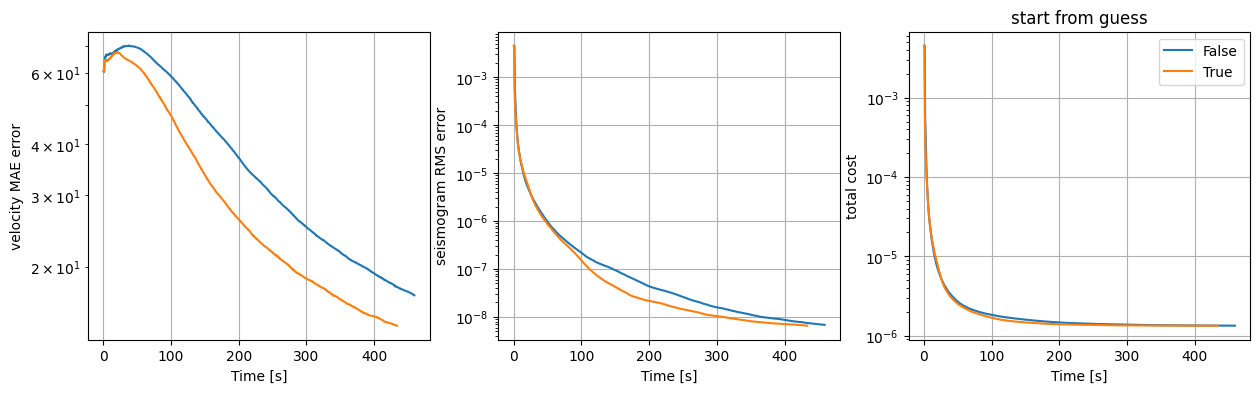

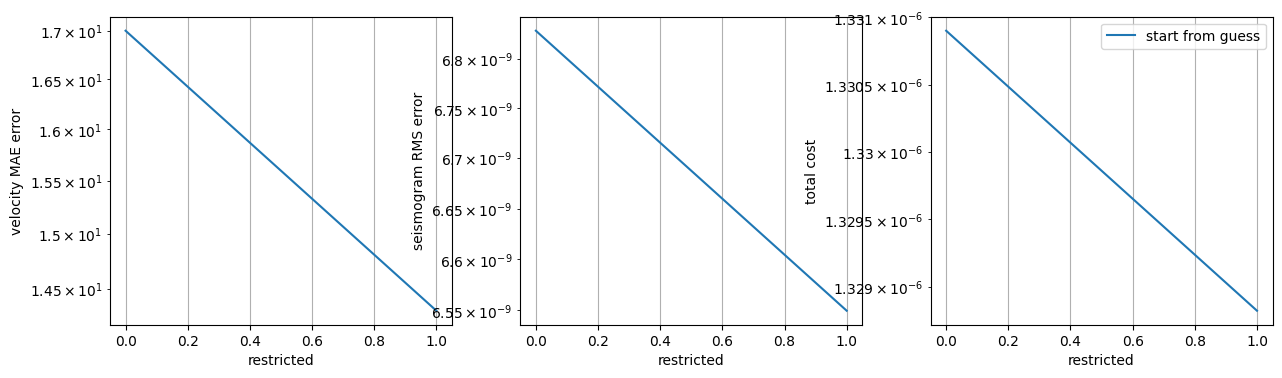

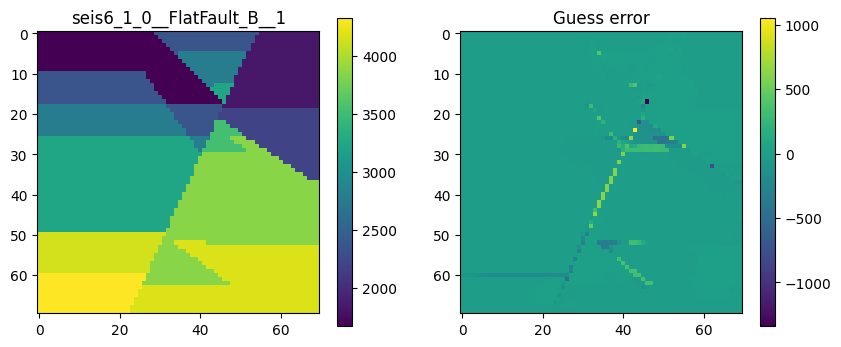

diag 4.3319269314914306e-05
(4901, 4901)


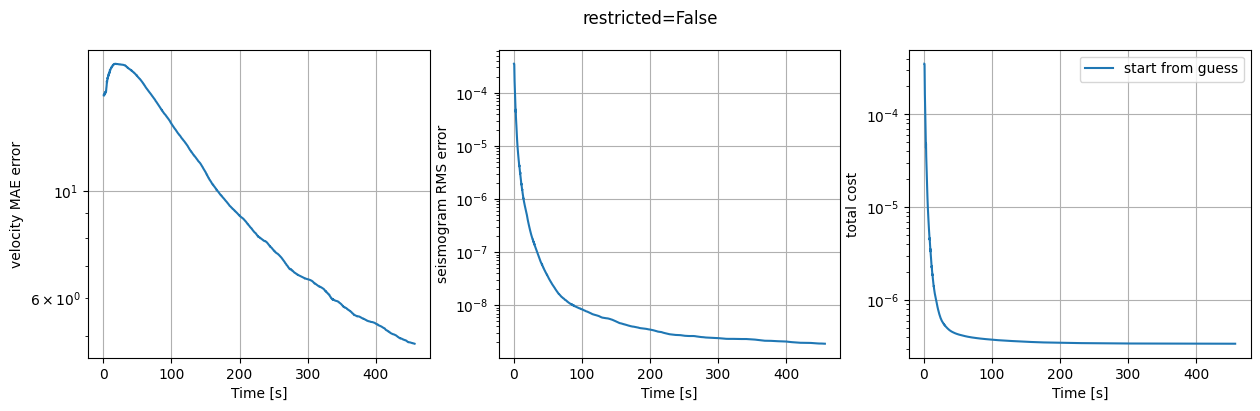

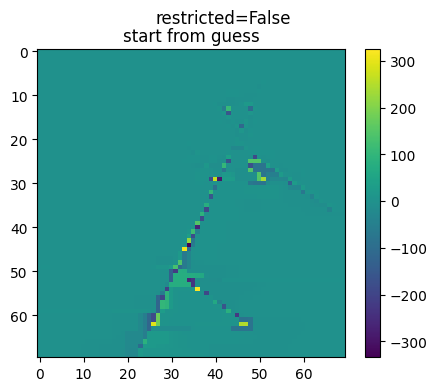

diag 4.3319269314914306e-05
(4901, 1327)


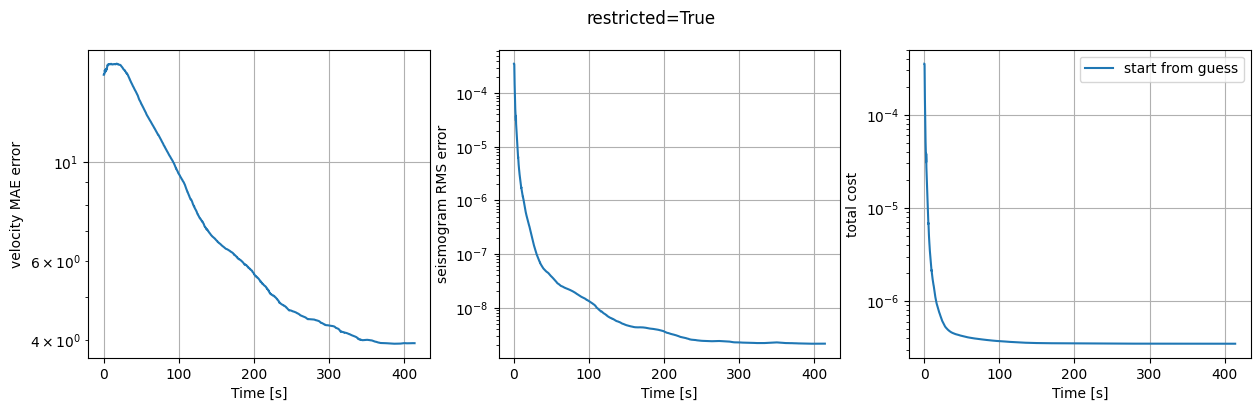

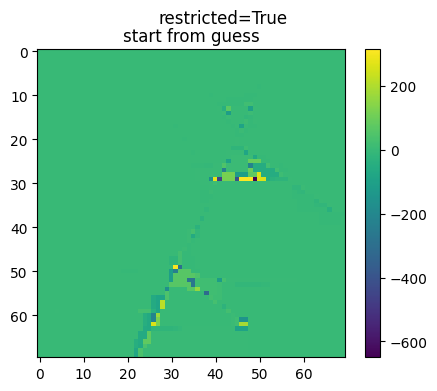

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.80it/s]


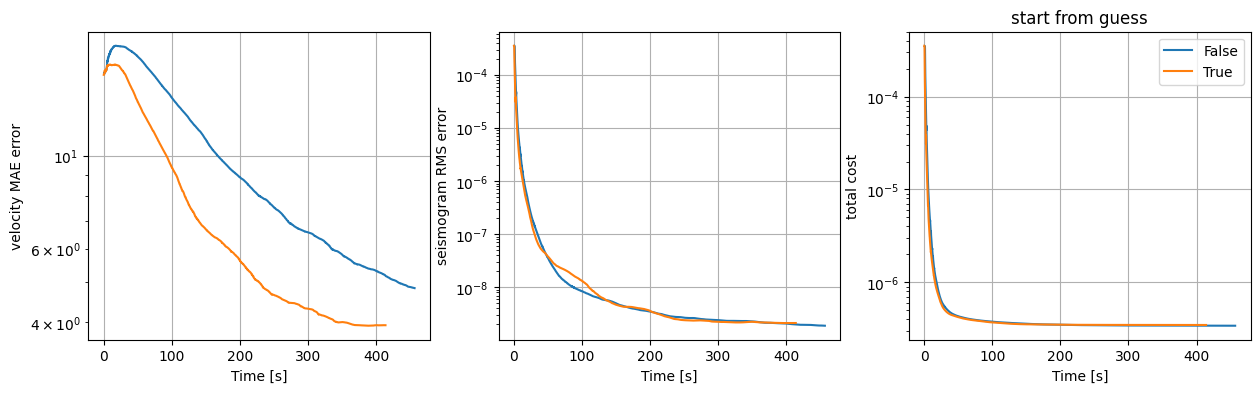

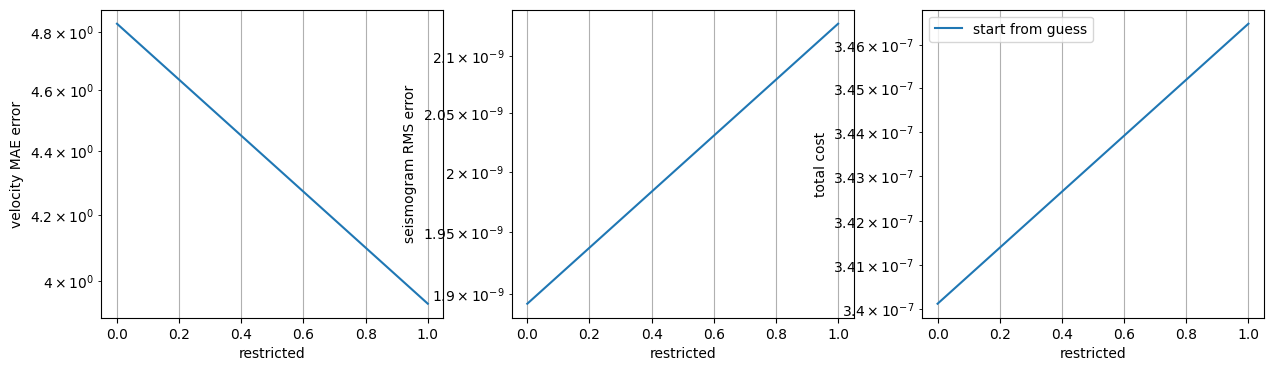

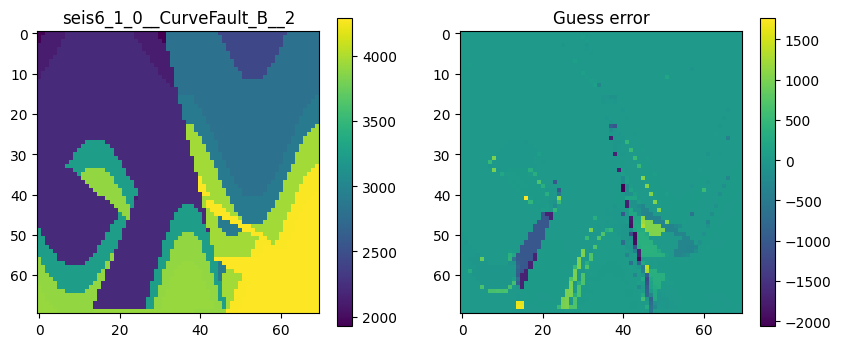

diag 3.7414936137285974e-05
(4901, 4901)


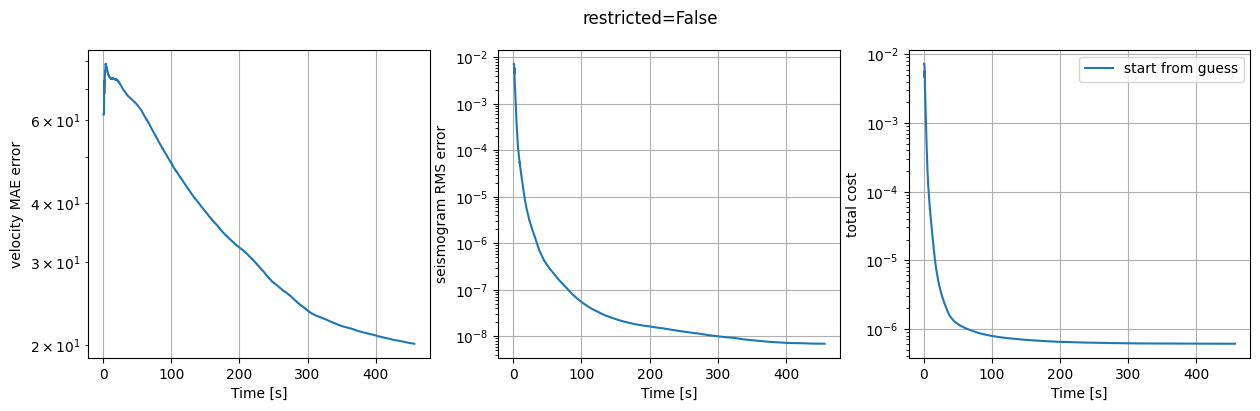

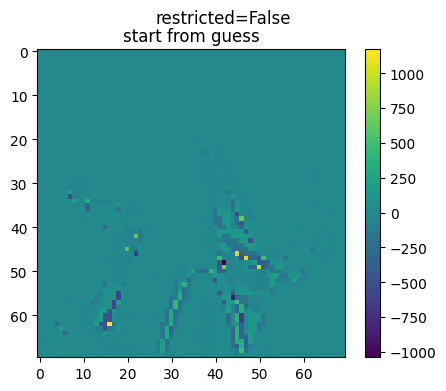

diag 3.7414936137285974e-05
(4901, 2036)


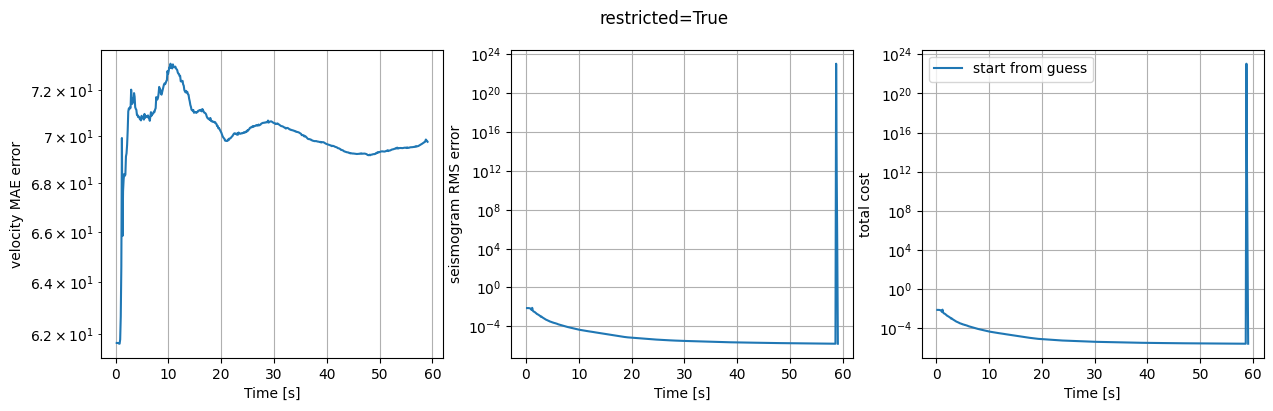

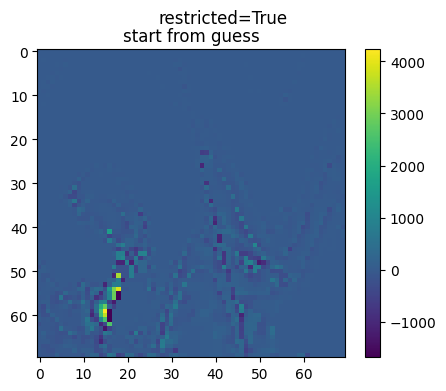

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.64it/s]


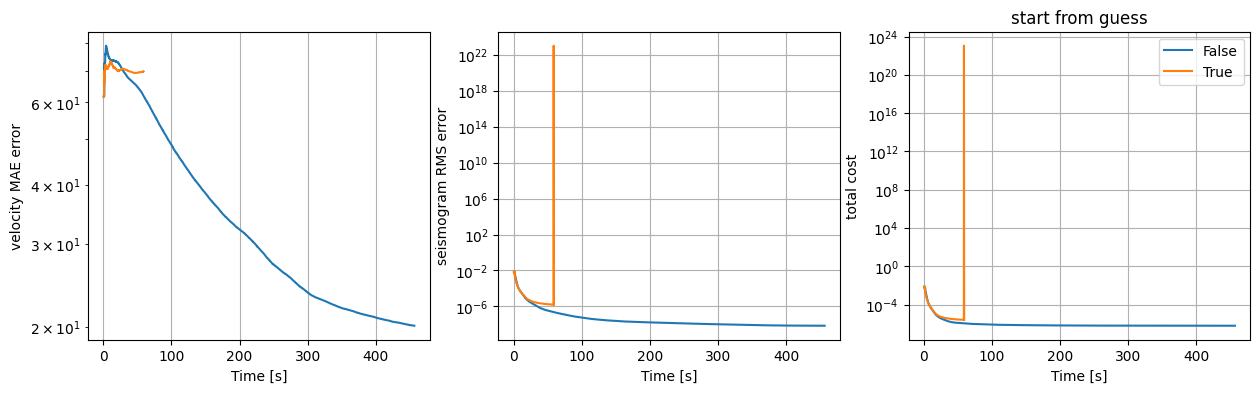

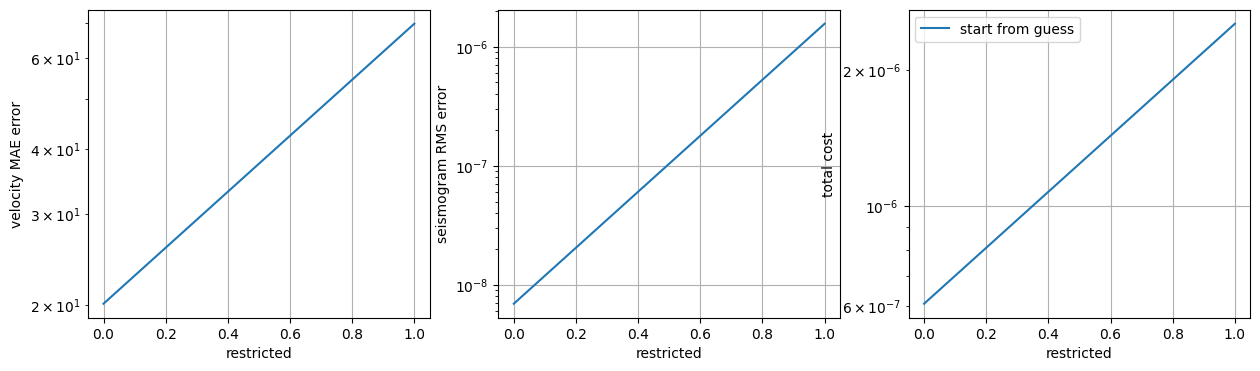

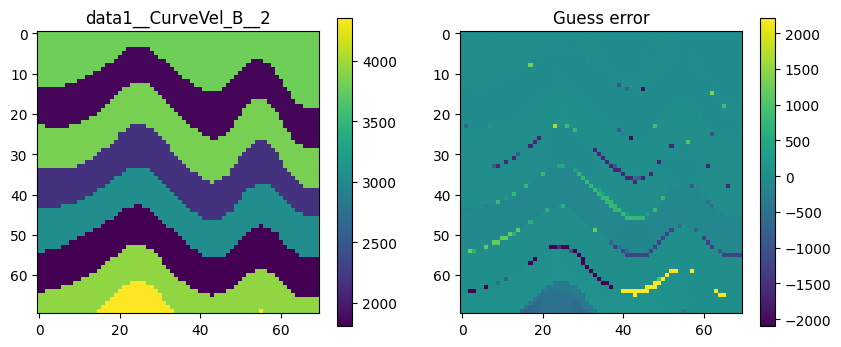

diag 2.0152803078557504e-05
(4901, 4901)


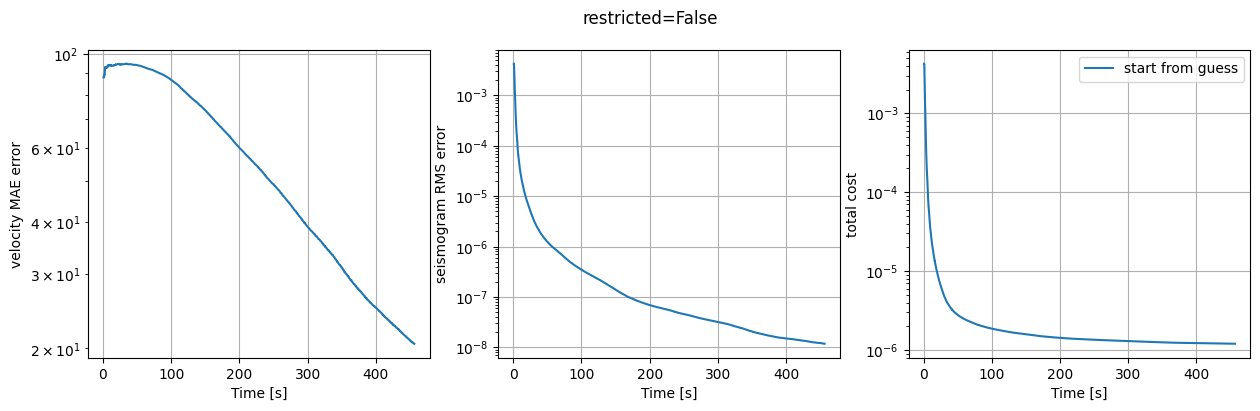

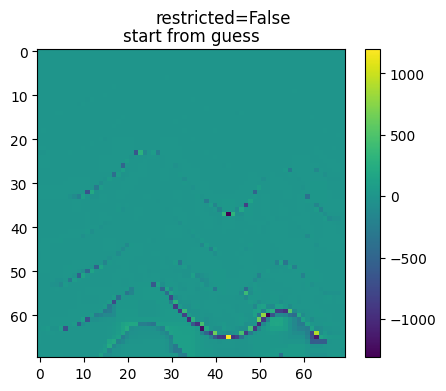

diag 2.0152803078557504e-05
(4901, 2533)


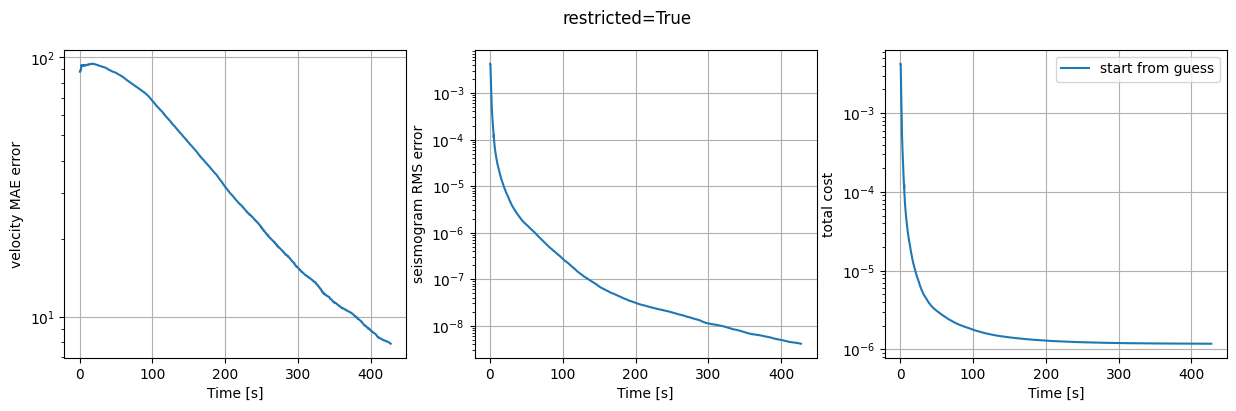

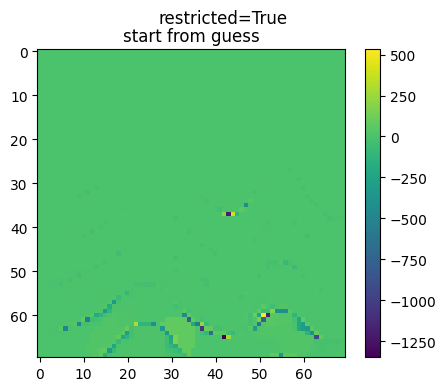

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.70it/s]


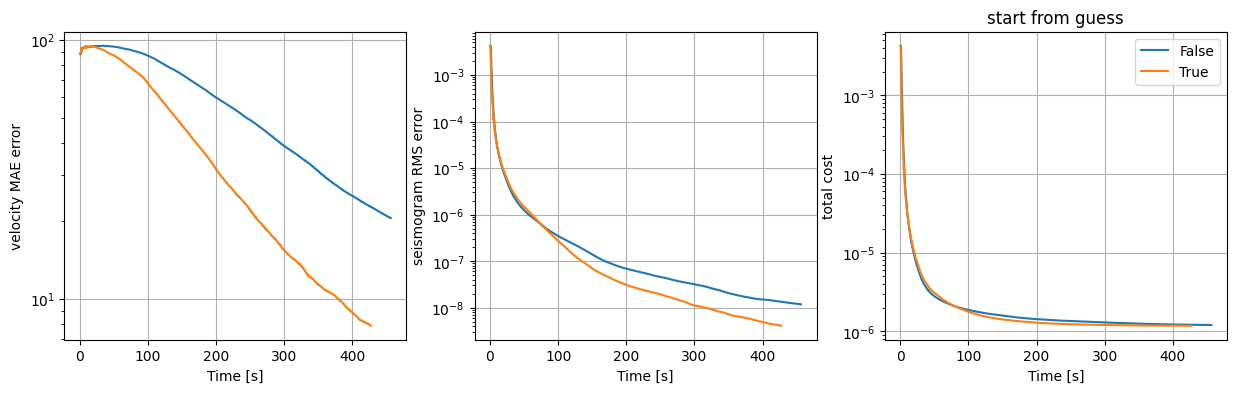

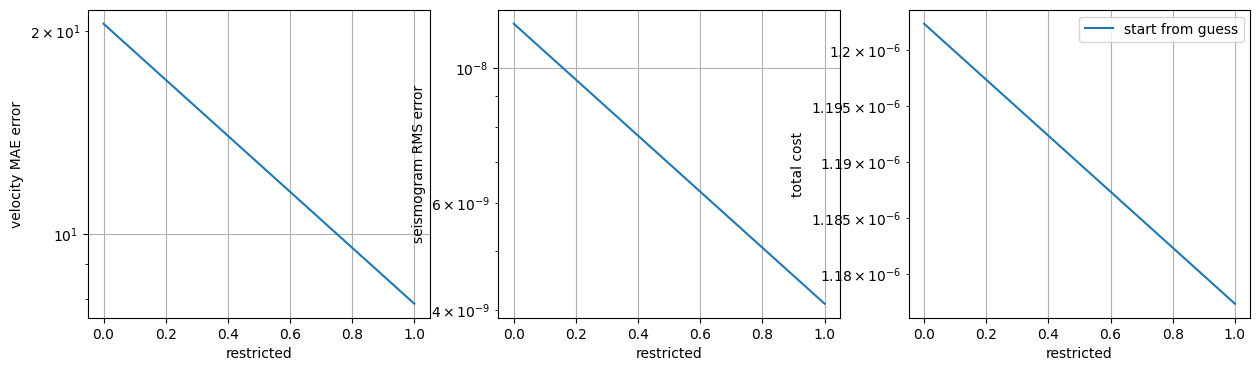

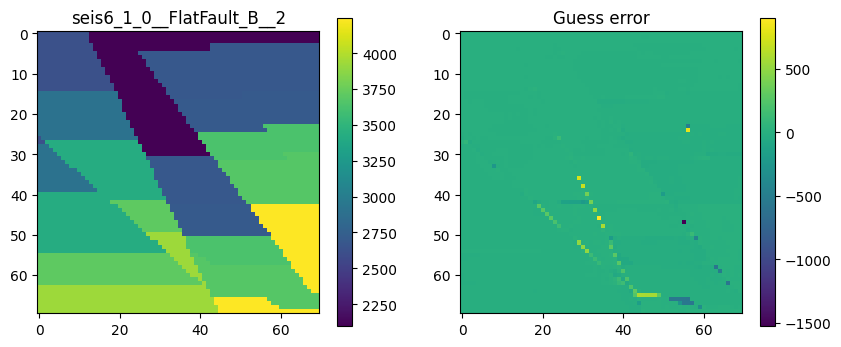

diag 5.487063020540949e-05
(4901, 4901)


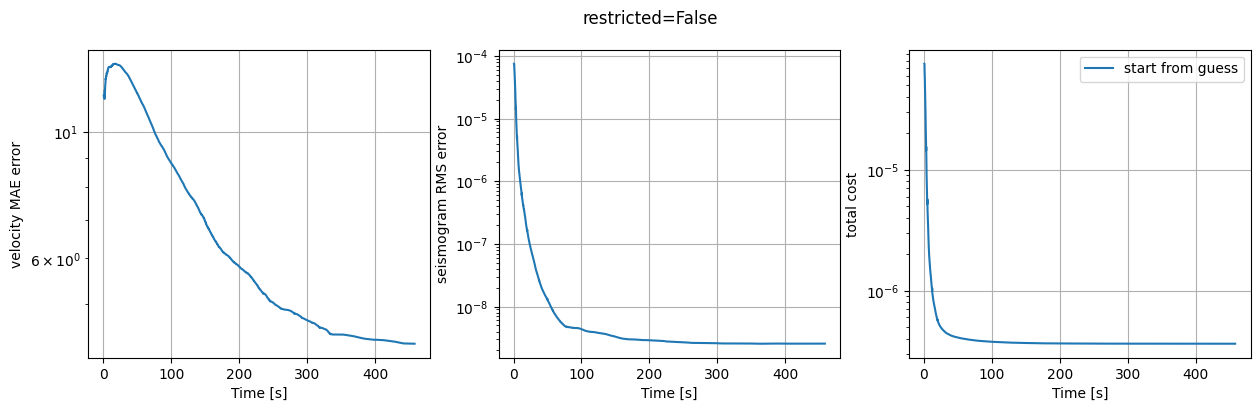

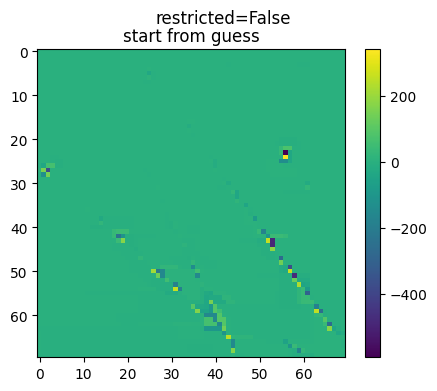

diag 5.487063020540949e-05
(4901, 1560)


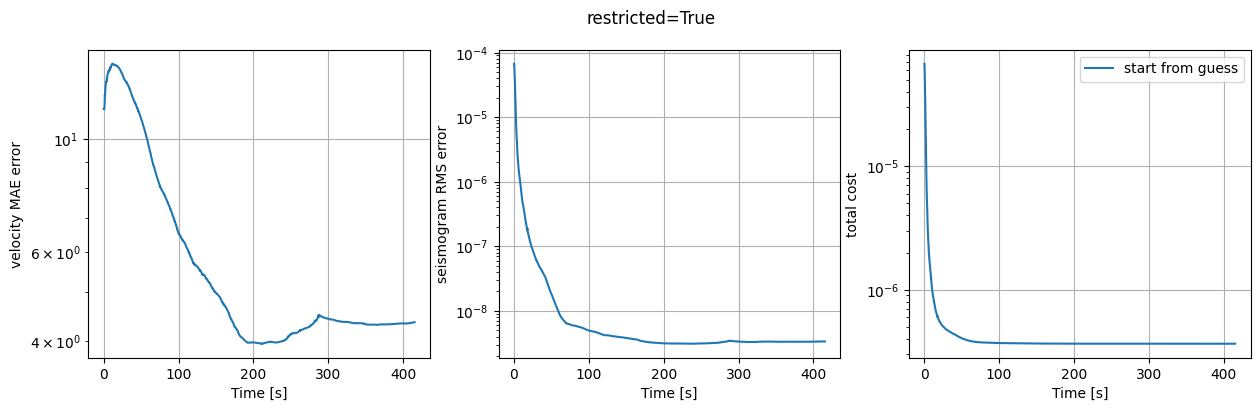

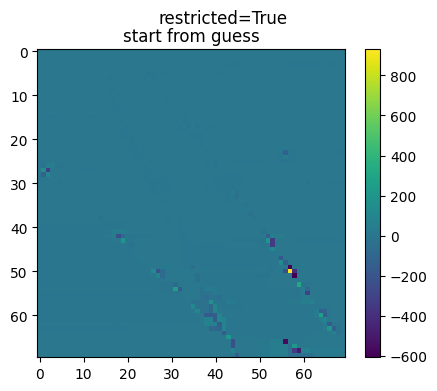

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.33it/s]


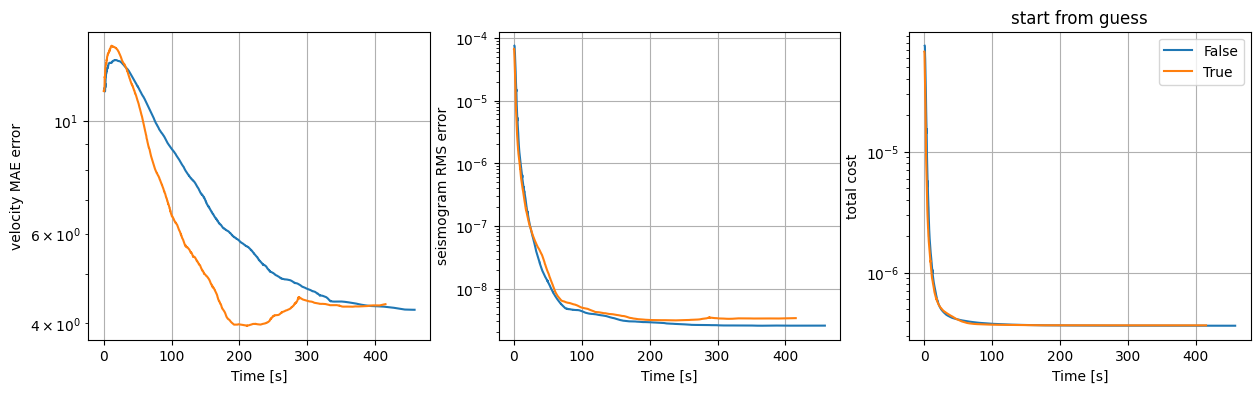

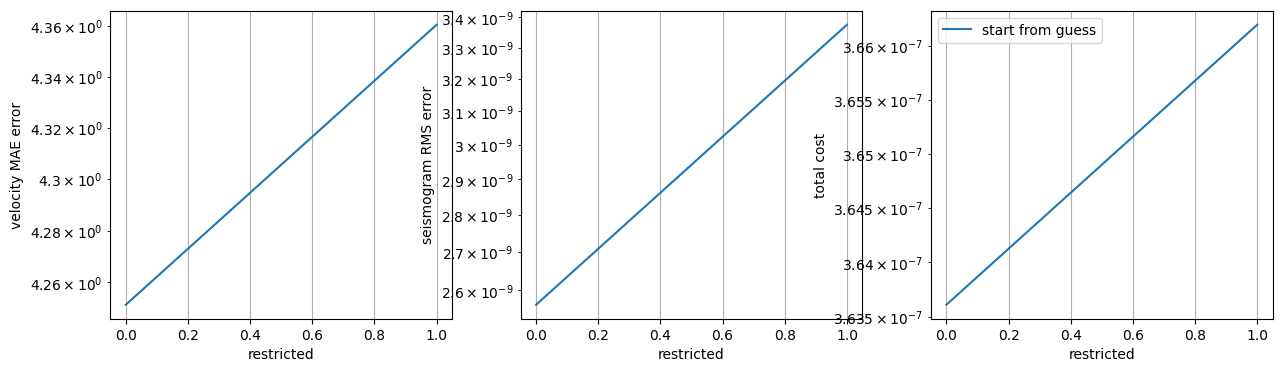

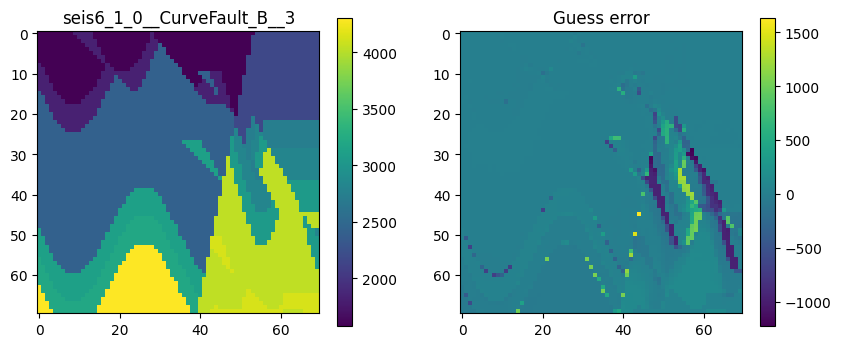

diag 3.229498101261271e-05
(4901, 4901)


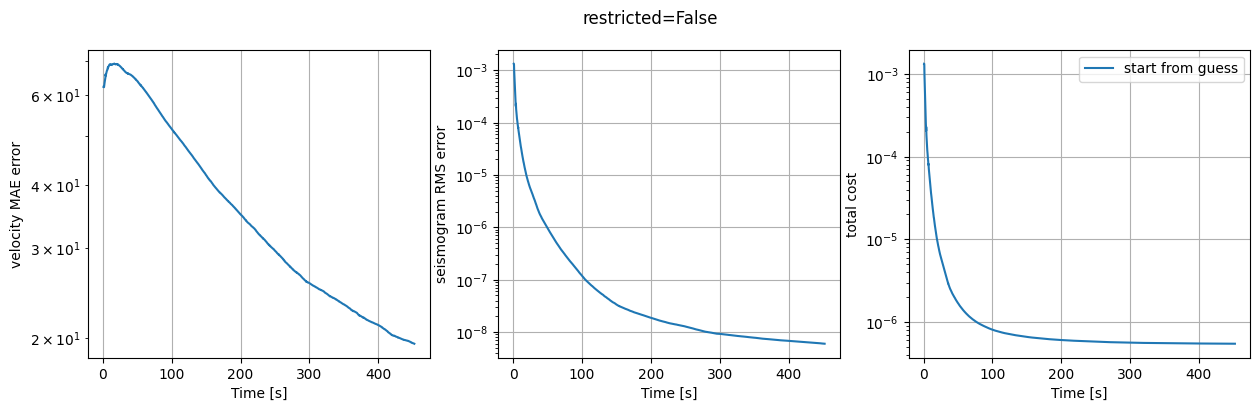

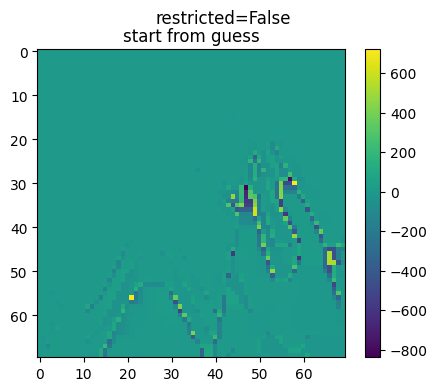

diag 3.229498101261271e-05
(4901, 2416)


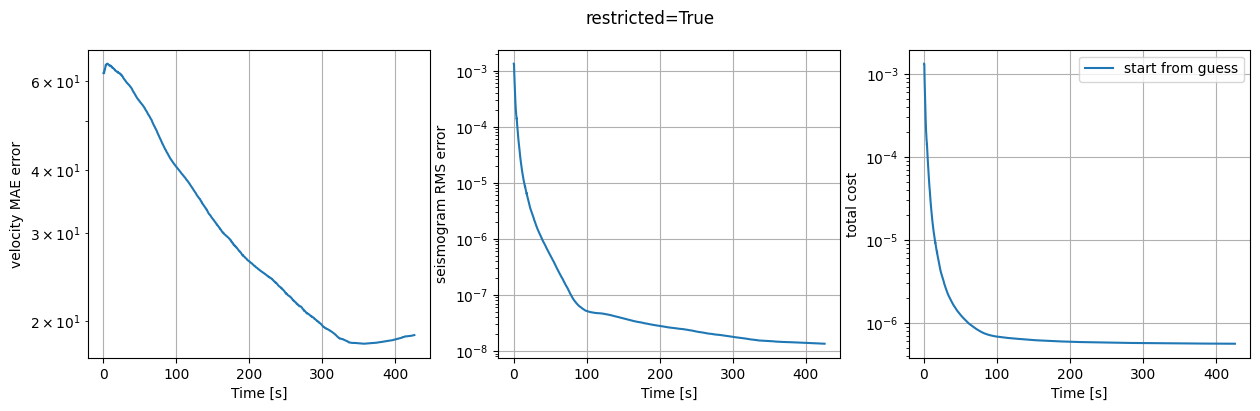

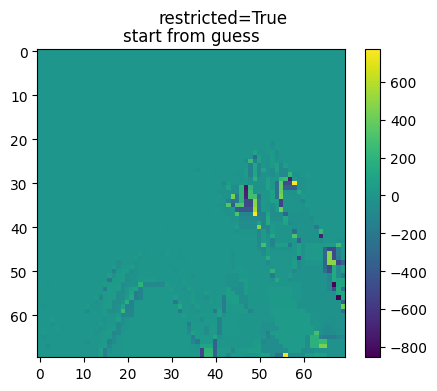

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.04it/s]


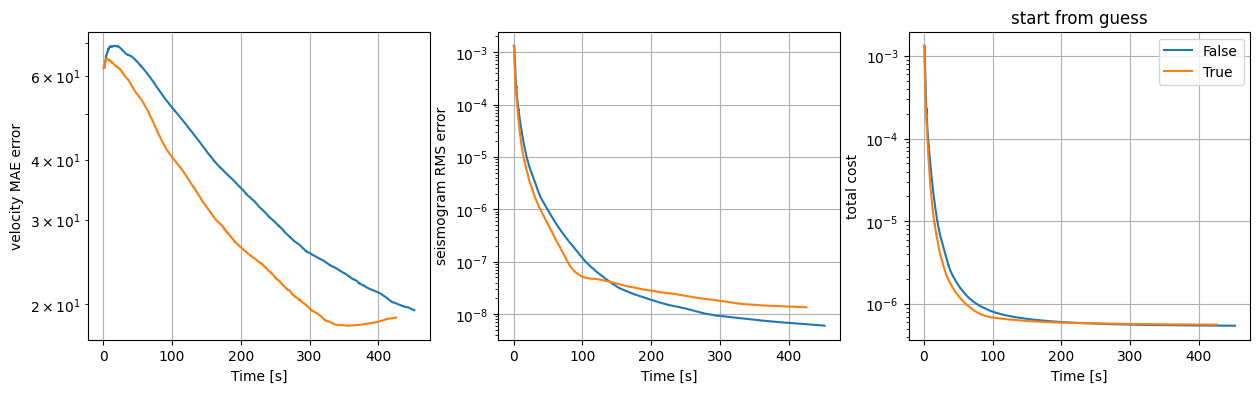

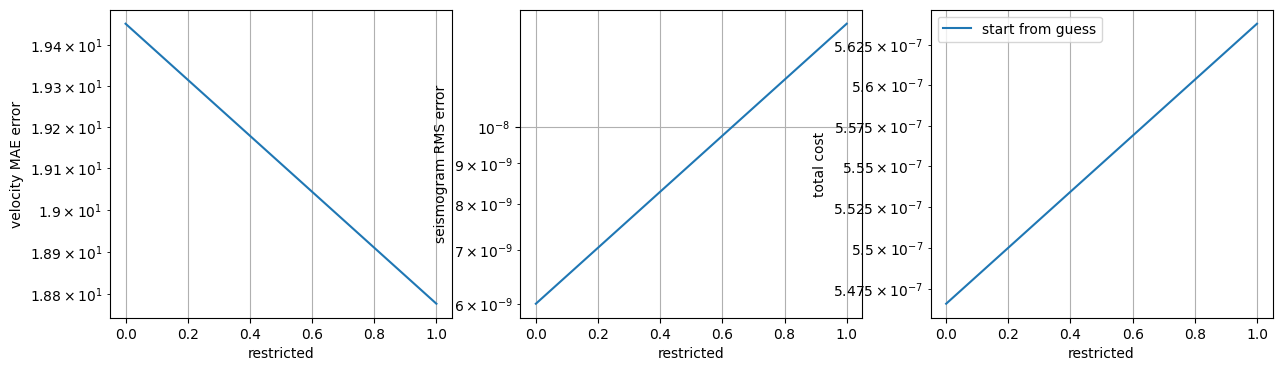

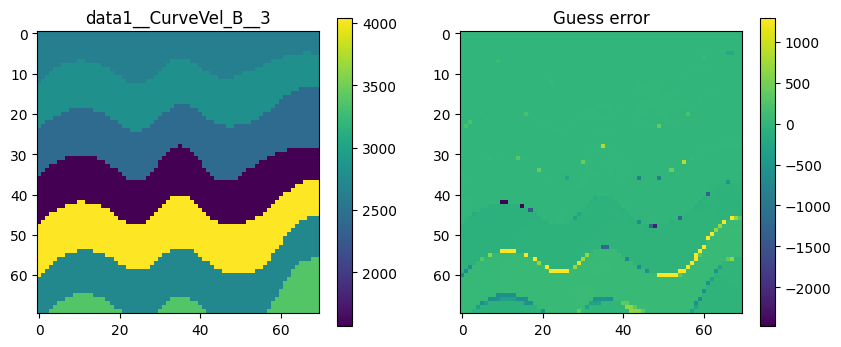

diag 2.6943617455292793e-05
(4901, 4901)


In [ ]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
model = seis_invert.InversionModel()
model.history_size = 10000
model.prior = seis_prior.TotalVariation()
model.prior.λ = 10**-8
model.show_convergence=True
model.iter_list = [2500]

do_which_list = [False,False,True]

def param_func(model,value):
    if value:
        old_prior = model.prior
        model.prior = seis_prior.RestrictFlatAreas()
        model.prior.underlying_prior = old_prior
        model.prior.prep()
    return model
    
param_values = [False,True]
param_name = "restricted"


for d in data:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0.)

In [ ]:
%debug